In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar archivo CSV
df = pd.read_csv("Nacimientos_20250206.csv")

# Información básica
print("Información del dataset")
print(df.info())
print("Primeras filas del dataset")
print(df.head())
print("Resumen estadístico del dataset")
print(df.describe())

Información del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Data columns (total 50 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   NÚMERO CERTIFICADO                             1558 non-null   int64  
 1   DEPARTAMENTO                                   1558 non-null   object 
 2   MUNICIPIO                                      1558 non-null   object 
 3   AREA NACIMIENTO                                1558 non-null   object 
 4   INSPECCION CORREGIMIENTO O CASERIO NACIMIENTO  1 non-null      object 
 5   SITIO NACIMIENTO                               1558 non-null   object 
 6   CÓDIGO INSTITUCIÓN                             1558 non-null   int64  
 7   NOMBRE INSTITUCIÓN                             1558 non-null   object 
 8   SEXO                                           1558 non-null   object 
 9   PESO (Gramos)               


Valores faltantes por columna:
NÚMERO CERTIFICADO                                  0
DEPARTAMENTO                                        0
MUNICIPIO                                           0
AREA NACIMIENTO                                     0
INSPECCION CORREGIMIENTO O CASERIO NACIMIENTO    1557
SITIO NACIMIENTO                                    0
CÓDIGO INSTITUCIÓN                                  0
NOMBRE INSTITUCIÓN                                  0
SEXO                                                0
PESO (Gramos)                                       0
TALLA (Centímetros)                                 0
FECHA NACIMIENTO                                    0
HORA NACIMIENTO                                     0
PARTO ATENDIDO POR                                  0
TIEMPO DE GESTACIÓN                                 0
NÚMERO CONSULTAS PRENATALES                         0
TIPO PARTO                                          0
MULTIPLICIDAD EMBARAZO                            

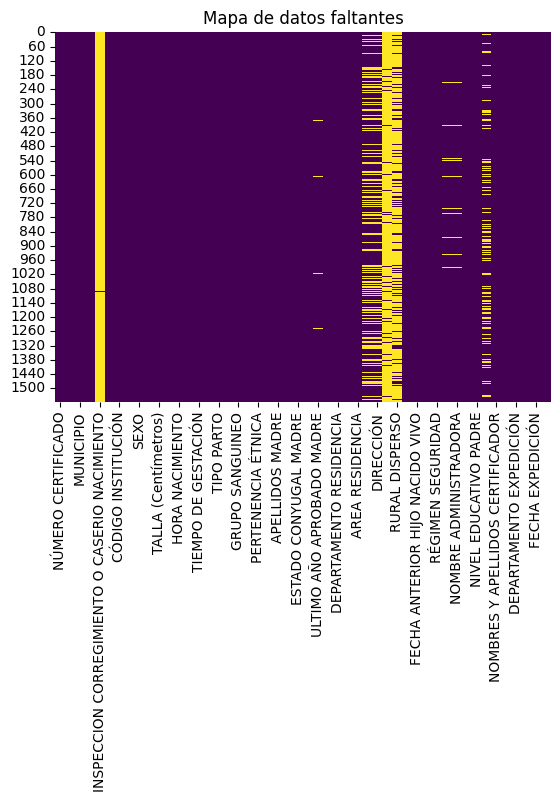

In [ ]:
# Valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# Visualización de nulos
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de datos faltantes")
plt.show()

In [ ]:
selected_columns = df[['SEXO', 'PESO (Gramos)', 'TALLA (Centímetros)', 'EDAD PADRE', 'EDAD MADRE', 'NÚMERO EMBARAZOS']]
display(selected_columns.head())

,SEXO,PESO (Gramos),TALLA (Centímetros),EDAD PADRE,EDAD MADRE,NÚMERO EMBARAZOS
0,MASCULINO,3410,51,26(4),21(4),2
1,MASCULINO,3002,49,24(4),20(4),1
2,FEMENINO,2215,45,25(4),21(4),1
3,FEMENINO,2875,46,20(4),22(4),1
4,FEMENINO,3265,50,22(4),19(4),2



Valores faltantes por columna:
SEXO                   0
PESO (Gramos)          0
TALLA (Centímetros)    0
EDAD PADRE             0
EDAD MADRE             0
NÚMERO EMBARAZOS       0
dtype: int64


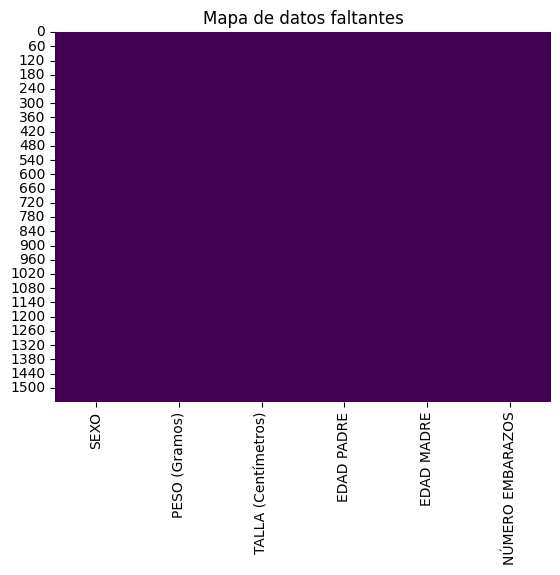

In [ ]:
# Valores faltantes
print("\nValores faltantes por columna:")
print(selected_columns.isnull().sum())

# Visualización de nulos
sns.heatmap(selected_columns.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de datos faltantes")
plt.show()

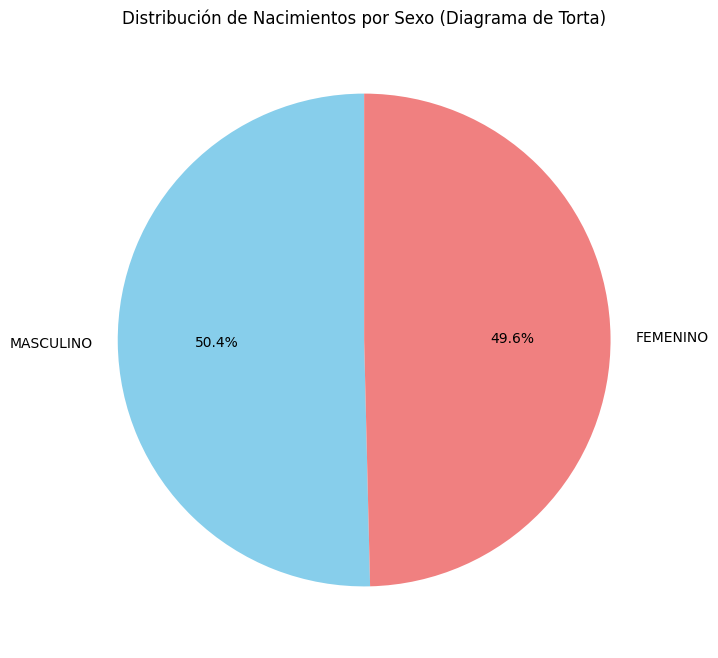

/tmp/ipython-input-3239353016.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sex_counts.index, y=sex_counts.values, palette='viridis')


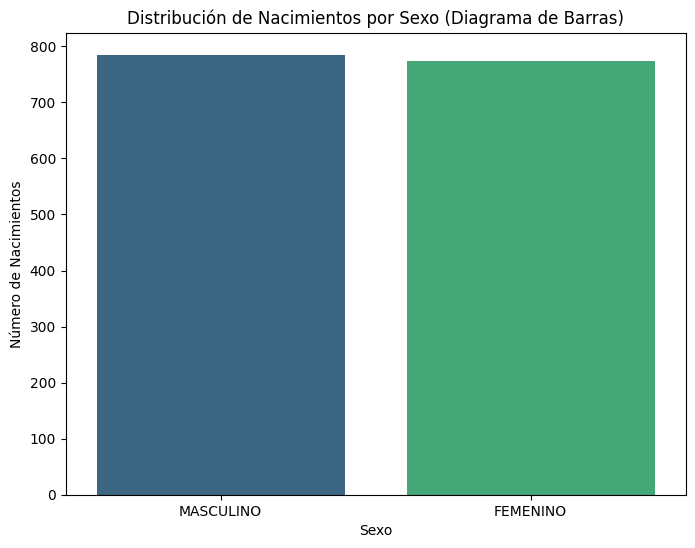

In [ ]:
# Contar la frecuencia de cada sexo
sex_counts = df['SEXO'].value_counts()

# Diagrama de torta
plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribución de Nacimientos por Sexo (Diagrama de Torta)')
plt.show()

# Diagrama de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=sex_counts.index, y=sex_counts.values, palette='viridis')
plt.title('Distribución de Nacimientos por Sexo (Diagrama de Barras)')
plt.xlabel('Sexo')
plt.ylabel('Número de Nacimientos')
plt.show()

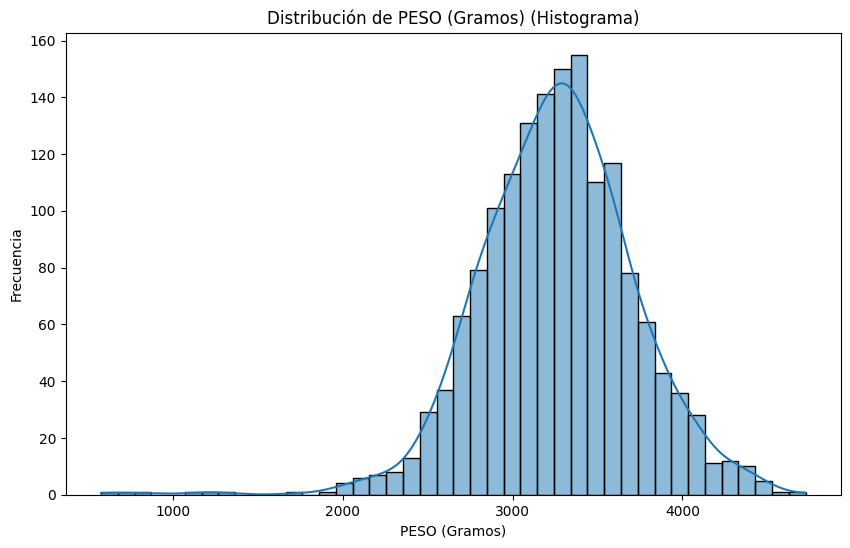

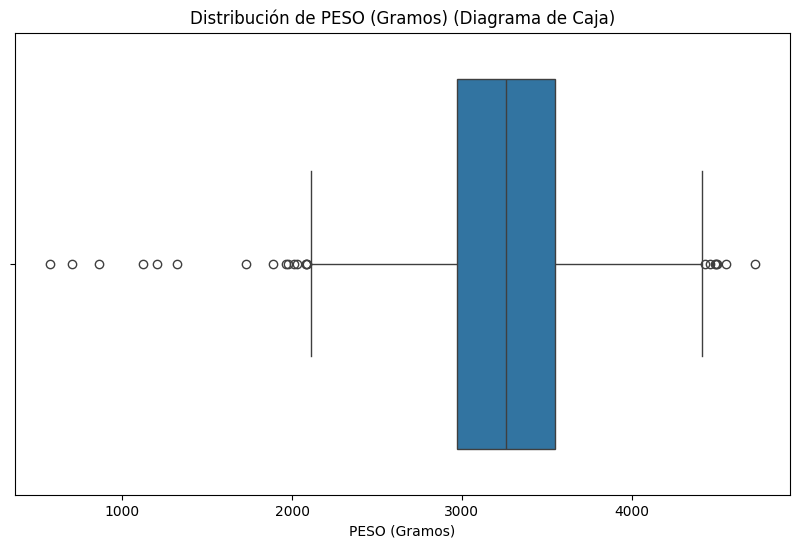

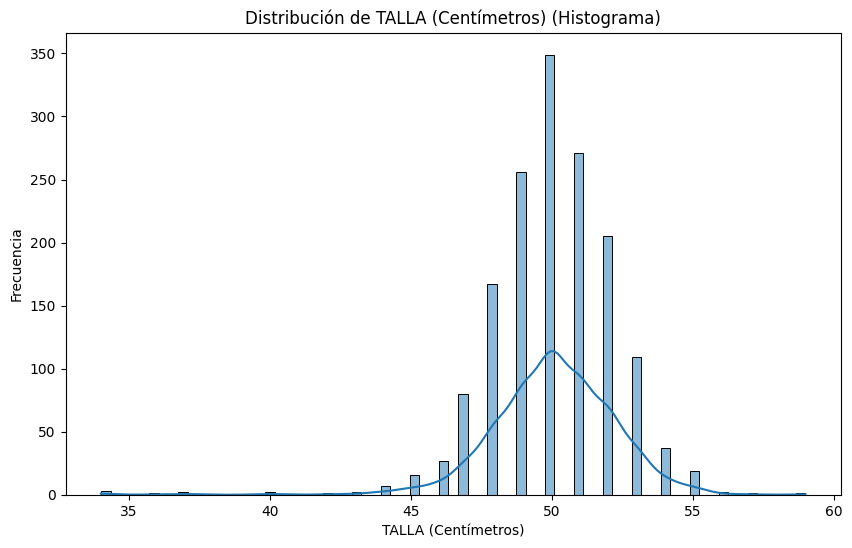

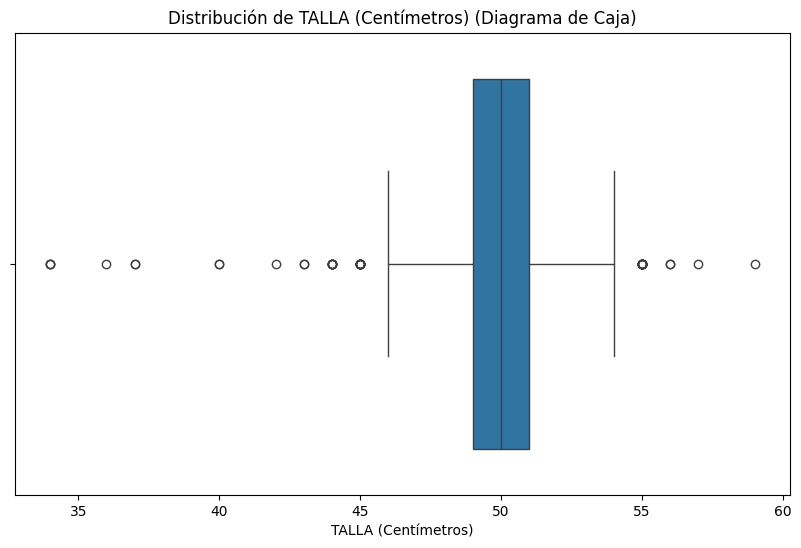

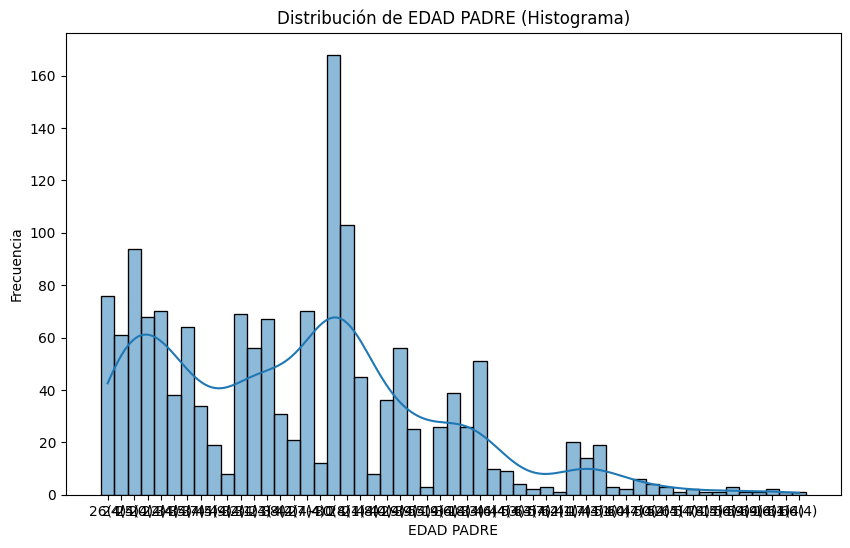

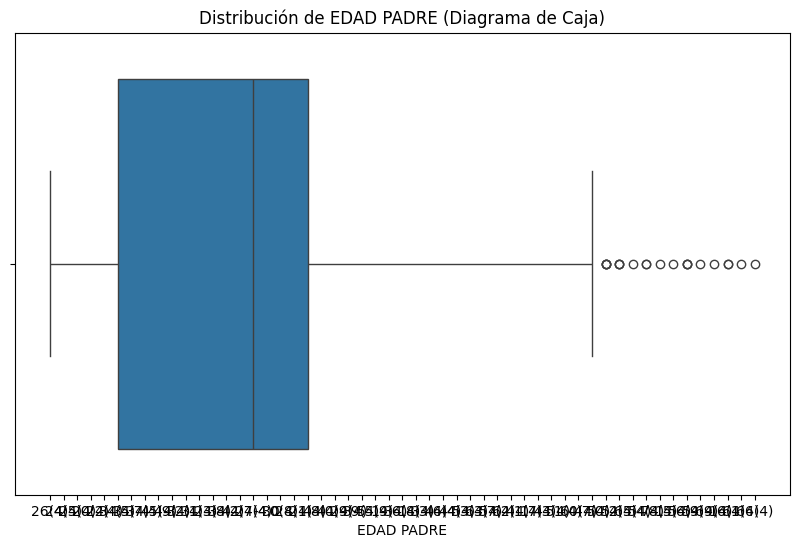

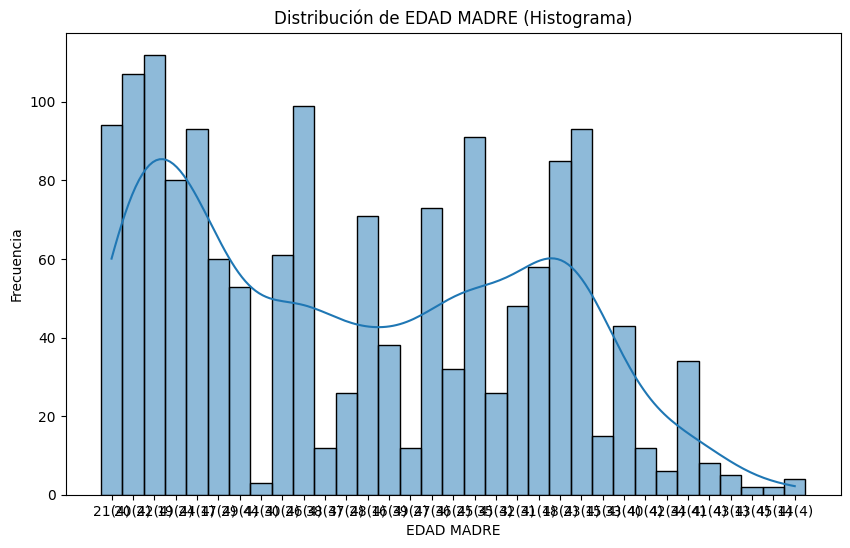

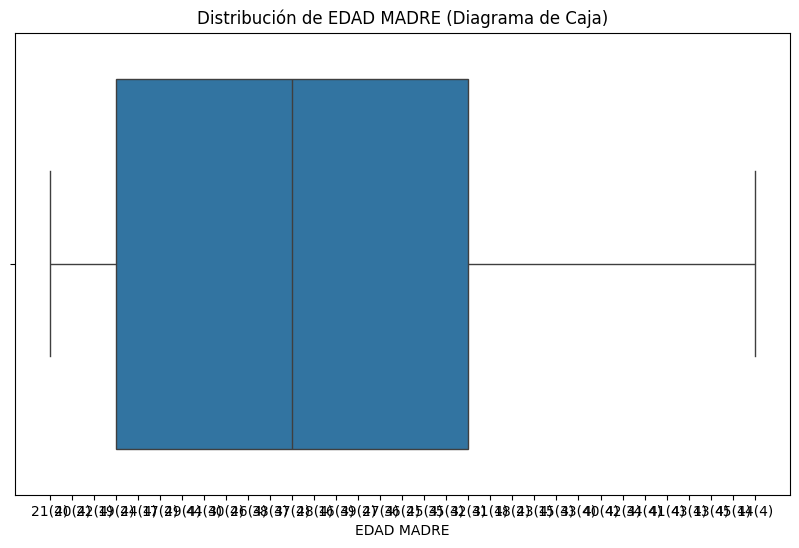

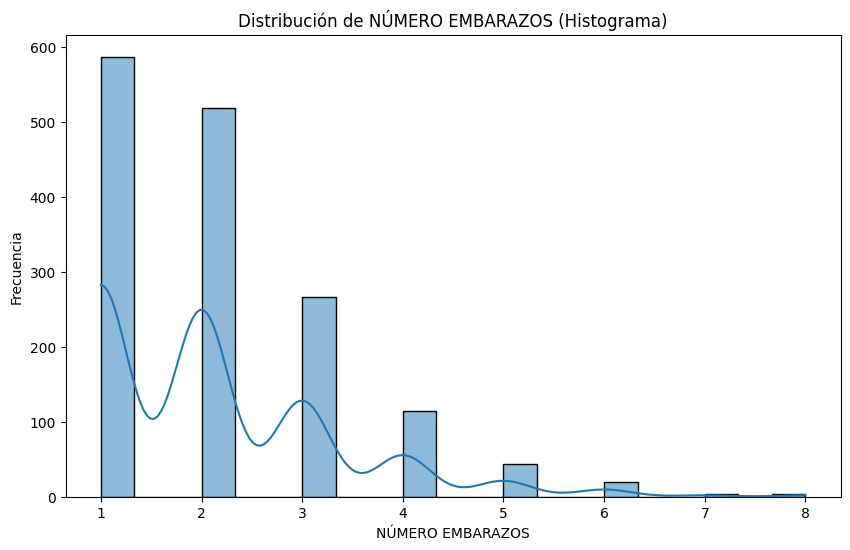

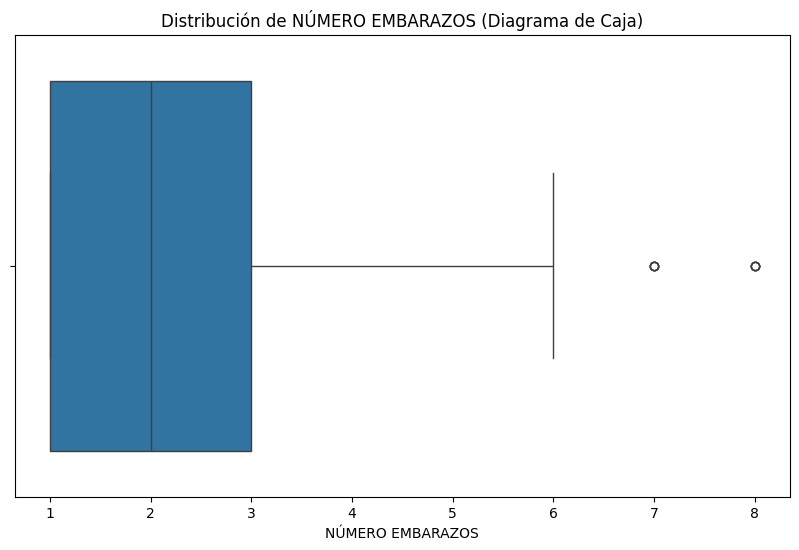

In [ ]:
# Lista de variables numéricas para visualizar
numerical_vars = ['PESO (Gramos)', 'TALLA (Centímetros)', 'EDAD PADRE', 'EDAD MADRE', 'NÚMERO EMBARAZOS']

for var in numerical_vars:
    # Histograma
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=var, kde=True)
    plt.title(f'Distribución de {var} (Histograma)')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

    # Diagrama de caja
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=var)
    plt.title(f'Distribución de {var} (Diagrama de Caja)')
    plt.xlabel(var)
    plt.show()

# Task
Analizar el conjunto de datos "recien_nacidos_2023.csv" para identificar y eliminar valores atípicos en las variables numéricas 'peso ( gramos )', 'talla ( centímetros )', 'edad padre', 'edad madre' y 'numero embarazos' utilizando el rango intercuartílico (IQR). Generar histogramas y diagramas de caja para estas variables antes y después de la eliminación de atípicos para visualizar el impacto de la limpieza.

## Identificar columnas numéricas

### Subtask:
Seleccionar las columnas numéricas relevantes para el análisis de valores atípicos.


**Reasoning**:
Create a list of the relevant numerical columns for outlier analysis.



In [ ]:
numerical_cols = ['PESO (Gramos)', 'TALLA (Centímetros)', 'EDAD PADRE', 'EDAD MADRE', 'NÚMERO EMBARAZOS']

## Calcular el iqr

### Subtask:
Para cada columna numérica, calcular el primer cuartil (Q1), el tercer cuartil (Q3) y el rango intercuartílico (IQR).


**Reasoning**:
I need to calculate Q1, Q3, and IQR for each numerical column specified in `numerical_cols`.



In [ ]:
quartiles_iqr = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    quartiles_iqr[col] = (Q1, Q3, IQR)

for col, values in quartiles_iqr.items():
    print(f"Columna: {col}")
    print(f"  Q1: {values[0]}")
    print(f"  Q3: {values[1]}")
    print(f"  IQR: {values[2]}")

TypeError: unsupported operand type(s) for -: 'str' and 'str'

**Reasoning**:
The error message "TypeError: unsupported operand type(s) for -: 'str' and 'str'" indicates that the 'EDAD PADRE' and 'EDAD MADRE' columns are of object type (likely strings) and cannot be used in numerical calculations like quantile. I need to convert these columns to a numerical type, handling the non-numeric characters like '(4)'.



In [ ]:
df['EDAD PADRE'] = df['EDAD PADRE'].str.replace(r'\(.*\)', '', regex=True).astype(int)
df['EDAD MADRE'] = df['EDAD MADRE'].str.replace(r'\(.*\)', '', regex=True).astype(int)

quartiles_iqr = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    quartiles_iqr[col] = (Q1, Q3, IQR)

for col, values in quartiles_iqr.items():
    print(f"Columna: {col}")
    print(f"  Q1: {values[0]}")
    print(f"  Q3: {values[1]}")
    print(f"  IQR: {values[2]}")

ValueError: invalid literal for int() with base 10: '-4.0'

**Reasoning**:
The error message "ValueError: invalid literal for int() with base 10: '-4.0'" indicates that there are still non-integer values in the 'EDAD PADRE' or 'EDAD MADRE' columns after attempting to remove the characters in parentheses. These values might be represented as strings like '-4.0' which cannot be directly converted to integers. I need to handle these invalid values, possibly by converting them to NaN before converting the column to integer type.



In [ ]:
df['EDAD PADRE'] = df['EDAD PADRE'].str.replace(r'\(.*\)', '', regex=True)
df['EDAD PADRE'] = pd.to_numeric(df['EDAD PADRE'], errors='coerce').astype('Int64')

df['EDAD MADRE'] = df['EDAD MADRE'].str.replace(r'\(.*\)', '', regex=True)
df['EDAD MADRE'] = pd.to_numeric(df['EDAD MADRE'], errors='coerce').astype('Int64')


quartiles_iqr = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    quartiles_iqr[col] = (Q1, Q3, IQR)

for col, values in quartiles_iqr.items():
    print(f"Columna: {col}")
    print(f"  Q1: {values[0]}")
    print(f"  Q3: {values[1]}")
    print(f"  IQR: {values[2]}")

Columna: PESO (Gramos)
  Q1: 2970.0
  Q3: 3550.0
  IQR: 580.0
Columna: TALLA (Centímetros)
  Q1: 49.0
  Q3: 51.0
  IQR: 2.0
Columna: EDAD PADRE
  Q1: 24.0
  Q3: 34.0
  IQR: 10.0
Columna: EDAD MADRE
  Q1: 20.0
  Q3: 29.0
  IQR: 9.0
Columna: NÚMERO EMBARAZOS
  Q1: 1.0
  Q3: 3.0
  IQR: 2.0


## Definir límites

### Subtask:
Establecer los límites inferior y superior para la detección de valores atípicos utilizando Q1, Q3 e IQR.


**Reasoning**:
Initialize the dictionary and iterate through the quartiles_iqr to calculate and store the lower and upper limits for outlier detection.



In [ ]:
outlier_limits = {}

for col, (Q1, Q3, IQR) in quartiles_iqr.items():
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outlier_limits[col] = (lower_limit, upper_limit)

for col, (lower, upper) in outlier_limits.items():
    print(f"Columna: {col}")
    print(f"  Límite Inferior: {lower}")
    print(f"  Límite Superior: {upper}")

Columna: PESO (Gramos)
  Límite Inferior: 2100.0
  Límite Superior: 4420.0
Columna: TALLA (Centímetros)
  Límite Inferior: 46.0
  Límite Superior: 54.0
Columna: EDAD PADRE
  Límite Inferior: 9.0
  Límite Superior: 49.0
Columna: EDAD MADRE
  Límite Inferior: 6.5
  Límite Superior: 42.5
Columna: NÚMERO EMBARAZOS
  Límite Inferior: -2.0
  Límite Superior: 6.0


## Identificar y eliminar atípicos

### Subtask:
Identificar las filas que contienen valores atípicos en las columnas numéricas y eliminarlas del DataFrame.


**Reasoning**:
Identify the rows with outliers and remove them to create a cleaned DataFrame.



In [ ]:
outlier_mask = pd.Series([False] * len(df))

for col, (lower, upper) in outlier_limits.items():
    if pd.api.types.is_numeric_dtype(df[col]):
        col_outlier_mask = (df[col] < lower) | (df[col] > upper)
        outlier_mask = outlier_mask | col_outlier_mask

df_cleaned = df[~outlier_mask].copy()

print("Número de filas antes de eliminar atípicos:", len(df))
print("Número de filas después de eliminar atípicos:", len(df_cleaned))
display(df_cleaned.head())

Número de filas antes de eliminar atípicos: 1558
Número de filas después de eliminar atípicos: 1434


,NÚMERO CERTIFICADO,DEPARTAMENTO,MUNICIPIO,AREA NACIMIENTO,INSPECCION CORREGIMIENTO O CASERIO NACIMIENTO,SITIO NACIMIENTO,CÓDIGO INSTITUCIÓN,NOMBRE INSTITUCIÓN,SEXO,PESO (Gramos),...,NOMBRE ADMINISTRADORA,EDAD PADRE,NIVEL EDUCATIVO PADRE,ULTIMO AÑO APROBADO PADRE,NOMBRES Y APELLIDOS CERTIFICADOR,PROFESIÓN CERTIFICADOR,DEPARTAMENTO EXPEDICIÓN,MUNICIPIO EXPEDICIÓN,FECHA EXPEDICIÓN,ESTADO CERTIFICADO
0,162060770,CALDAS,LA DORADA,CABECERA MUNICIPAL,NaN,INSTITUCIÓN DE SALUD,173800051901,173800051901 ESE HOSPITAL SAN FELIX,MASCULINO,3410,...,CONVIDA - ARS CONVIDA,26,TECNOLÓGICA,3.0,ANDREA DUQUE LOPEZ,MÉDICO,CALDAS,LA DORADA,2021-01-01T05:00:00Z,CONFIRMADO
1,162060788,CALDAS,LA DORADA,CABECERA MUNICIPAL,NaN,INSTITUCIÓN DE SALUD,173800051901,173800051901 ESE HOSPITAL SAN FELIX,MASCULINO,3002,...,E.P.S. FAMISANAR LTDA.-CM,24,MEDIA ACADÉMICA O CLÁSICA,11.0,ALDEMAR PIEDRAHITA VILLAMIL,MÉDICO,CALDAS,LA DORADA,2021-01-01T05:00:00Z,CONFIRMADO
3,162060806,CALDAS,LA DORADA,CABECERA MUNICIPAL,NaN,INSTITUCIÓN DE SALUD,173800051901,173800051901 ESE HOSPITAL SAN FELIX,FEMENINO,2875,...,E.P.S. FAMISANAR LTDA.-CM,20,BÁSICA SECUNDARIA,9.0,ANDREA DUQUE LOPEZ,MÉDICO,CALDAS,LA DORADA,2021-01-02T05:00:00Z,CONFIRMADO
4,162060813,CALDAS,LA DORADA,CABECERA MUNICIPAL,NaN,INSTITUCIÓN DE SALUD,173800051901,173800051901 ESE HOSPITAL SAN FELIX,FEMENINO,3265,...,LA NUEVA EPS S.A.-CM,22,BÁSICA SECUNDARIA,9.0,ANDREA DUQUE LOPEZ,MÉDICO,CALDAS,LA DORADA,2021-01-02T05:00:00Z,CONFIRMADO
5,162060820,CALDAS,LA DORADA,CABECERA MUNICIPAL,NaN,INSTITUCIÓN DE SALUD,173800051901,173800051901 ESE HOSPITAL SAN FELIX,MASCULINO,2575,...,NUEVA EPS SA,26,MEDIA ACADÉMICA O CLÁSICA,11.0,JESSICA MARYAM CARDONA MUÑOZ,MÉDICO,CALDAS,LA DORADA,2021-01-03T05:00:00Z,CONFIRMADO


## Verificar la limpieza

### Subtask:
Mostrar información sobre el DataFrame resultante (por ejemplo, la forma y un resumen descriptivo) para confirmar la eliminación de los valores atípicos.


**Reasoning**:
Display the shape and descriptive statistics of the cleaned DataFrame to confirm the outlier removal.



In [ ]:
print("Forma del DataFrame después de eliminar atípicos:", df_cleaned.shape)
print("\nResumen estadístico del DataFrame después de eliminar atípicos:")
display(df_cleaned.describe())

Forma del DataFrame después de eliminar atípicos: (1434, 50)

Resumen estadístico del DataFrame después de eliminar atípicos:


,NÚMERO CERTIFICADO,CÓDIGO INSTITUCIÓN,PESO (Gramos),TALLA (Centímetros),TIEMPO DE GESTACIÓN,NÚMERO CONSULTAS PRENATALES,EDAD MADRE,ULTIMO AÑO APROBADO MADRE,NÚMERO HIJOS NACIDOS VIVOS,NÚMERO EMBARAZOS,EDAD PADRE,ULTIMO AÑO APROBADO PADRE
count,1.434000e+03,1.434000e+03,1434.000000,1434.000000,1434.000000,1434.000000,1434.0,1414.000000,1434.000000,1434.000000,1434.0,1109.000000
mean,1.661620e+08,1.738001e+11,3273.735704,50.146444,38.817992,6.075314,25.087866,7.742574,1.874477,2.062762,29.458159,7.869252
std,3.657611e+06,0.000000e+00,402.907523,1.760077,1.165776,2.129097,5.949481,3.136920,0.964624,1.124600,6.897717,3.267558
min,1.620608e+08,1.738001e+11,2130.000000,46.000000,33.000000,0.000000,13.0,1.000000,1.000000,1.000000,15.0,1.000000
25%,1.620781e+08,1.738001e+11,2990.000000,49.000000,38.000000,5.000000,20.0,5.000000,1.000000,1.000000,24.0,5.000000
50%,1.649887e+08,1.738001e+11,3265.000000,50.000000,39.000000,6.000000,24.0,9.000000,2.000000,2.000000,29.0,9.000000
75%,1.698379e+08,1.738001e+11,3540.000000,51.000000,40.000000,7.000000,29.0,11.000000,2.000000,3.000000,34.0,11.000000
max,1.725364e+08,1.738001e+11,4415.000000,54.000000,42.000000,19.000000,42.0,13.000000,6.000000,6.000000,49.0,11.000000


## Visualizar distribuciones actualizadas

### Subtask:
Generar histogramas y diagramas de caja para las columnas numéricas después de eliminar los valores atípicos para visualizar el impacto de la limpieza.


**Reasoning**:
Generate histograms and box plots for the numerical columns in the cleaned dataframe to visualize the data distribution after outlier removal.



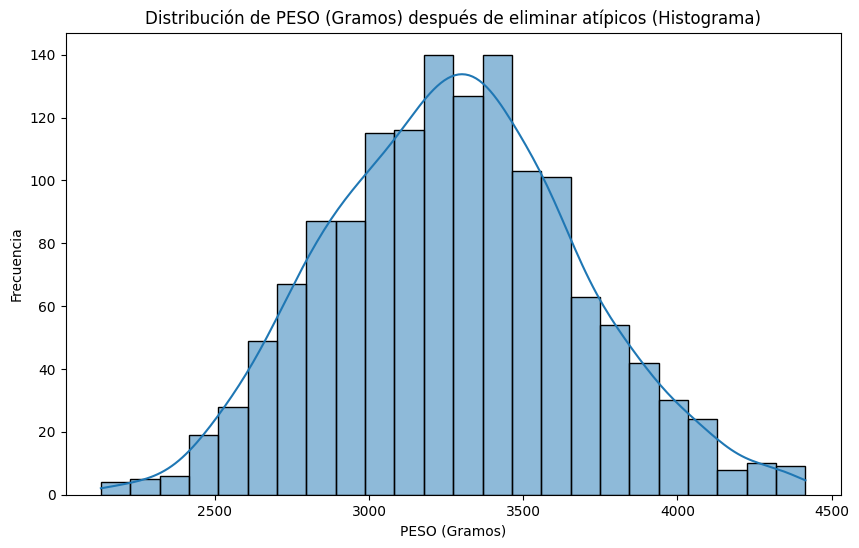

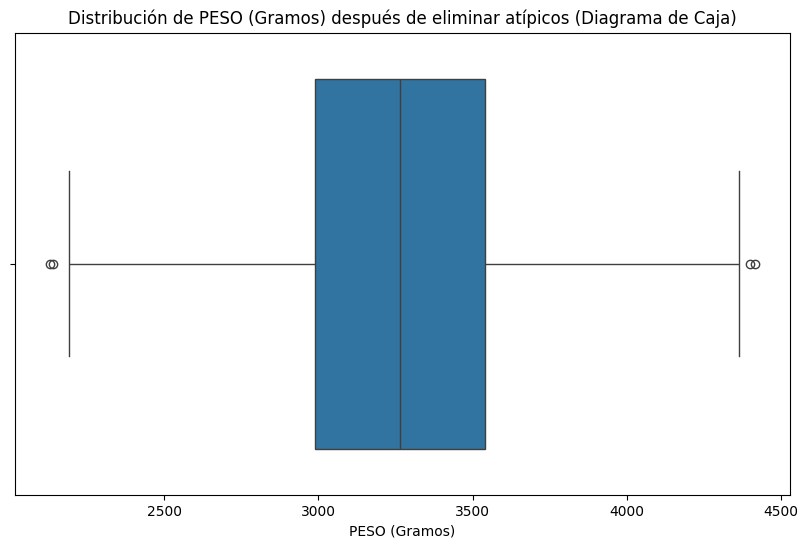

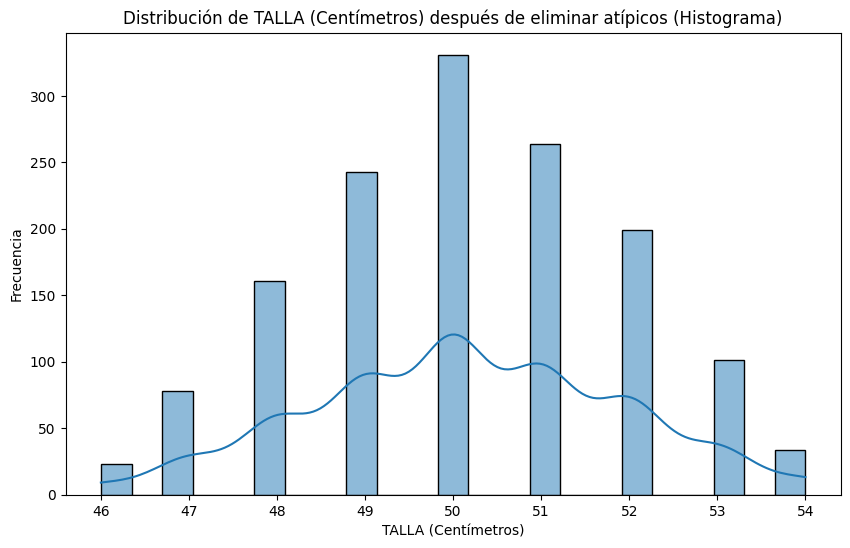

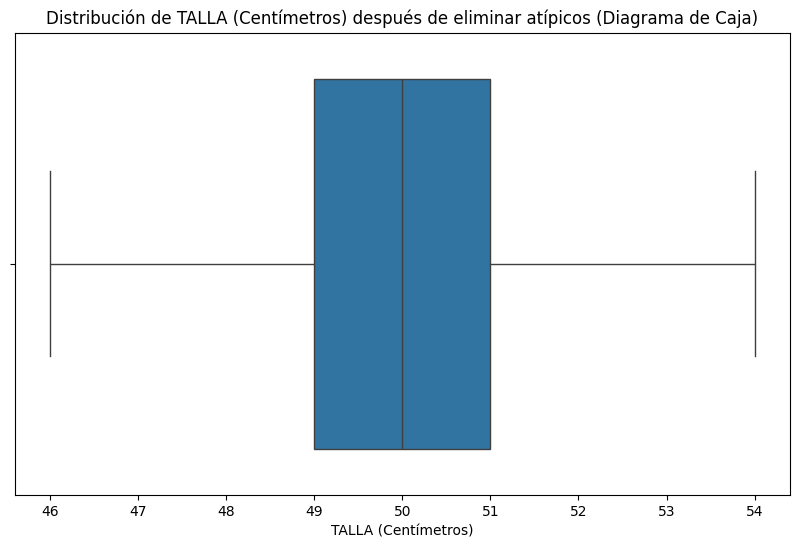

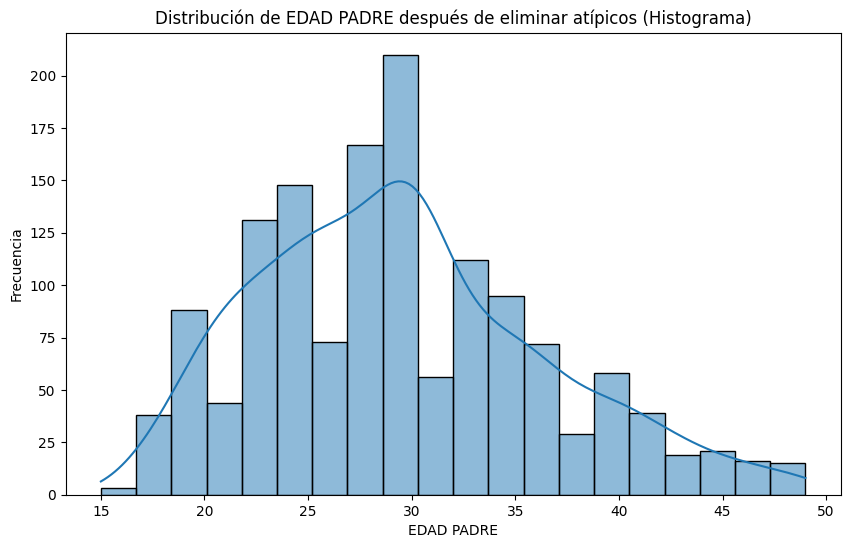

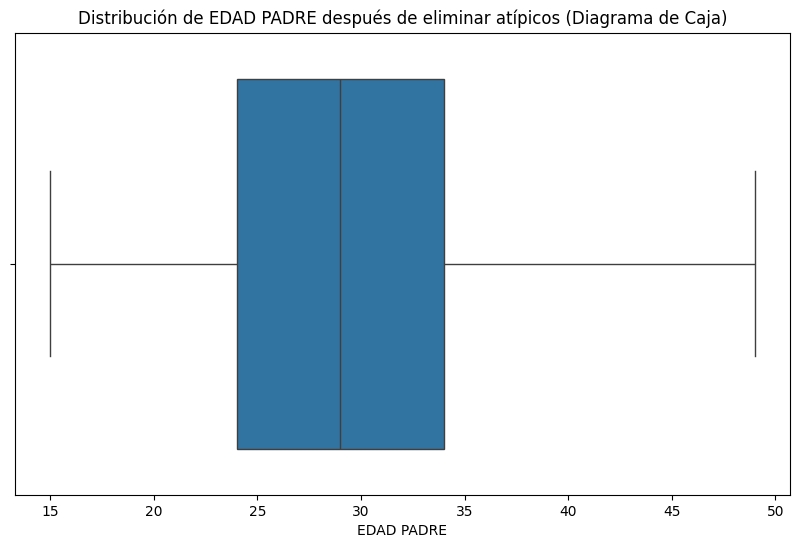

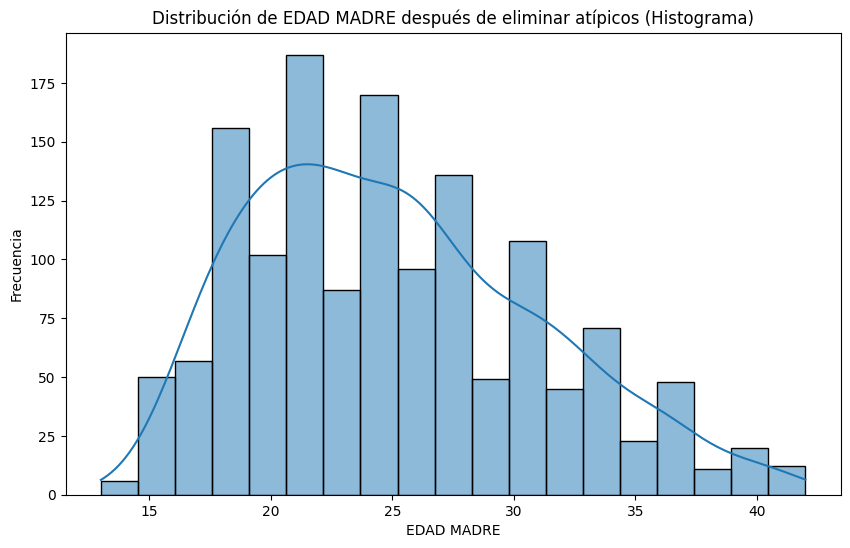

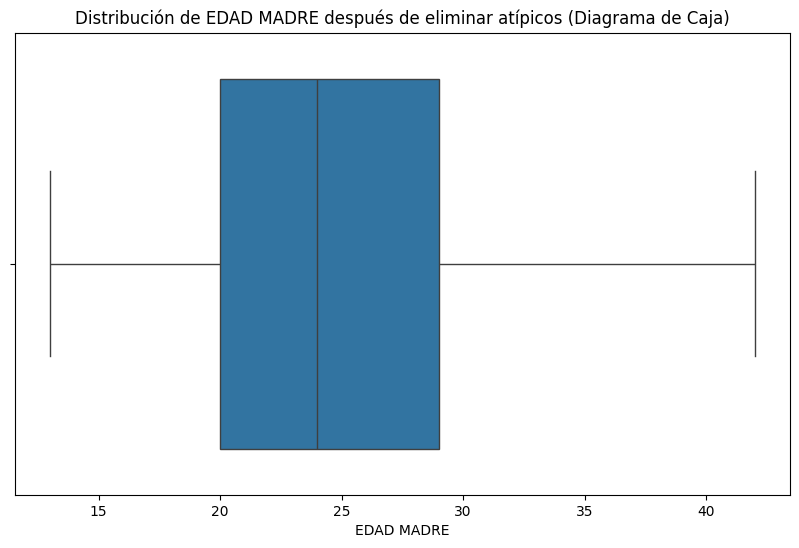

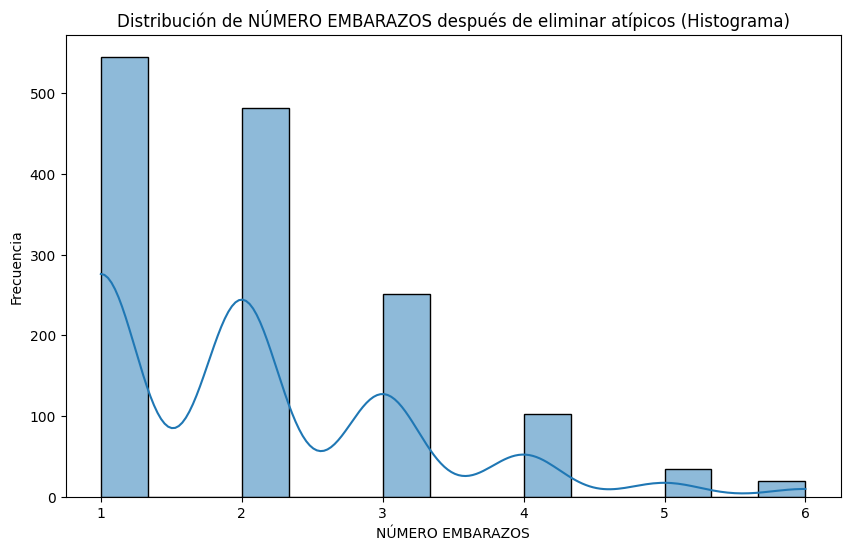

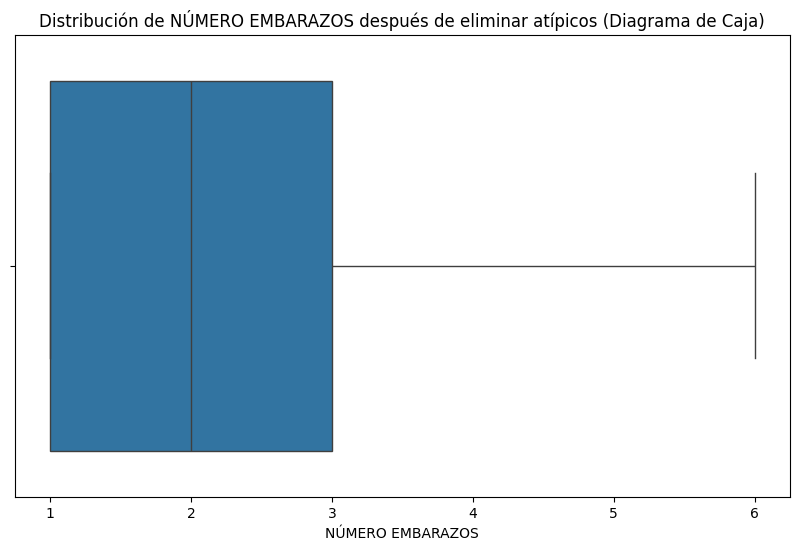

In [ ]:
numerical_cols = ['PESO (Gramos)', 'TALLA (Centímetros)', 'EDAD PADRE', 'EDAD MADRE', 'NÚMERO EMBARAZOS']

for var in numerical_cols:
    # Histograma
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_cleaned, x=var, kde=True)
    plt.title(f'Distribución de {var} después de eliminar atípicos (Histograma)')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

    # Diagrama de caja
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_cleaned, x=var)
    plt.title(f'Distribución de {var} después de eliminar atípicos (Diagrama de Caja)')
    plt.xlabel(var)
    plt.show()

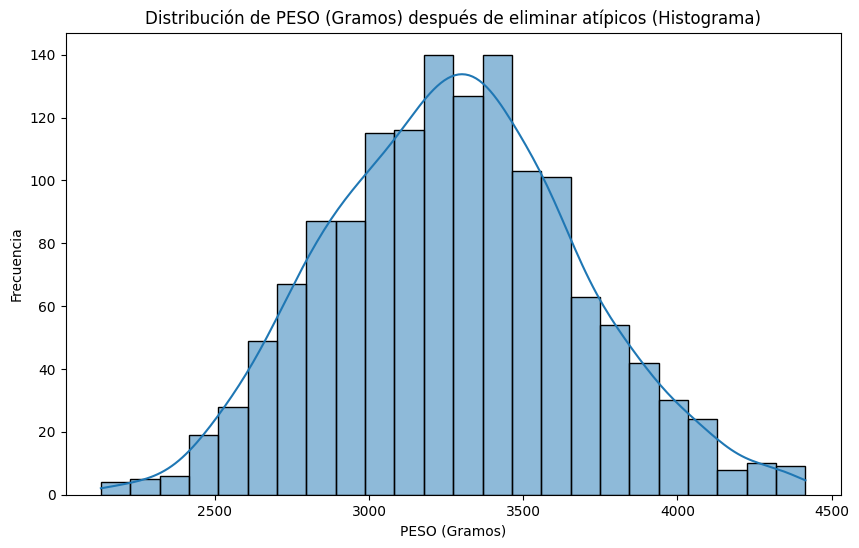

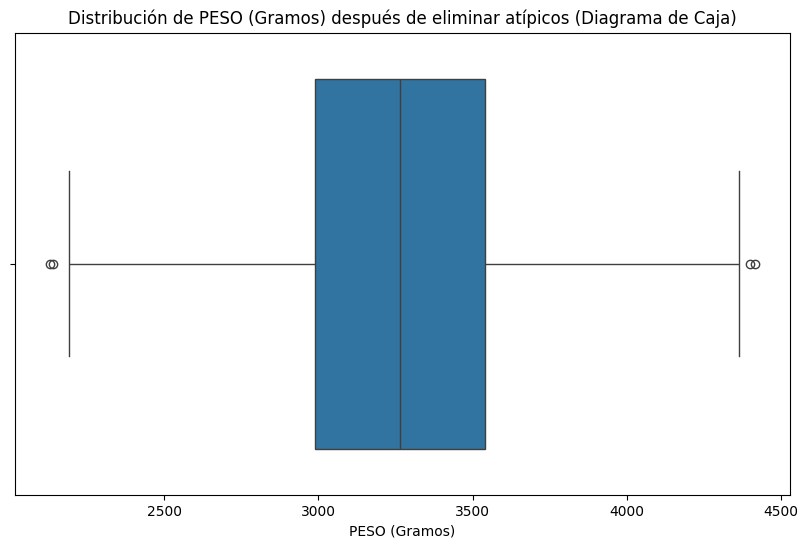

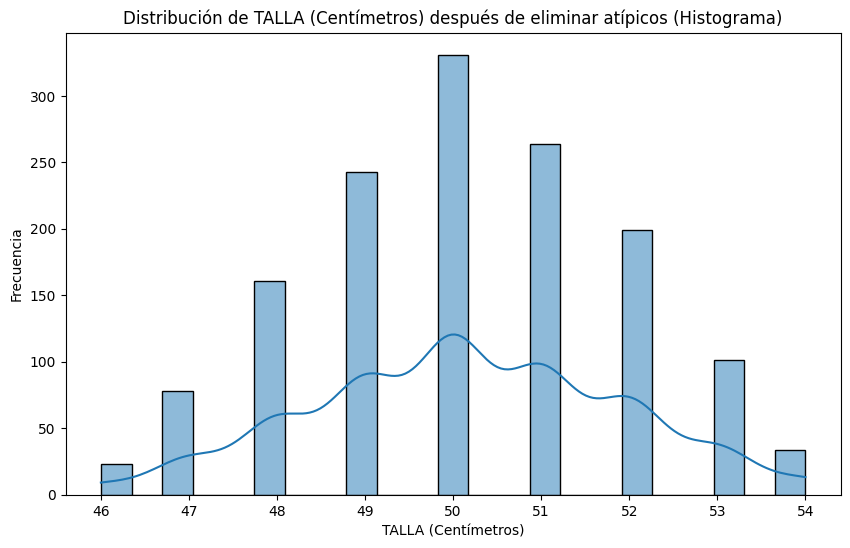

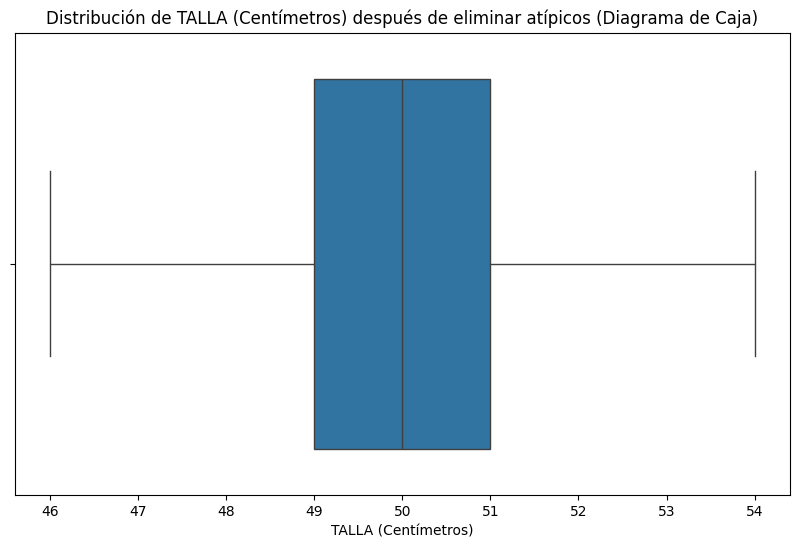

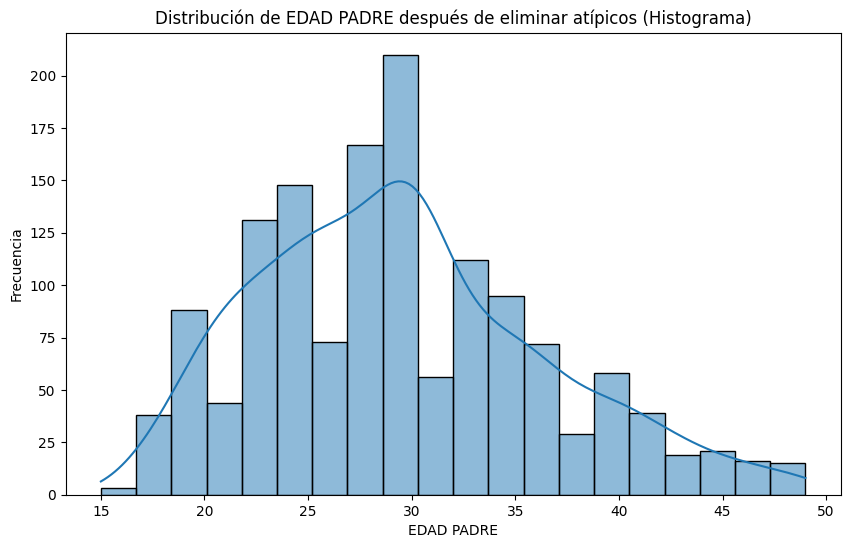

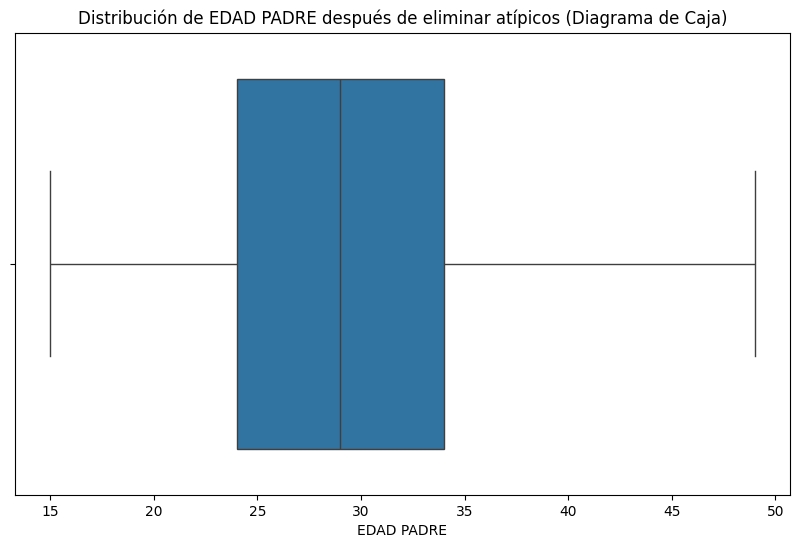

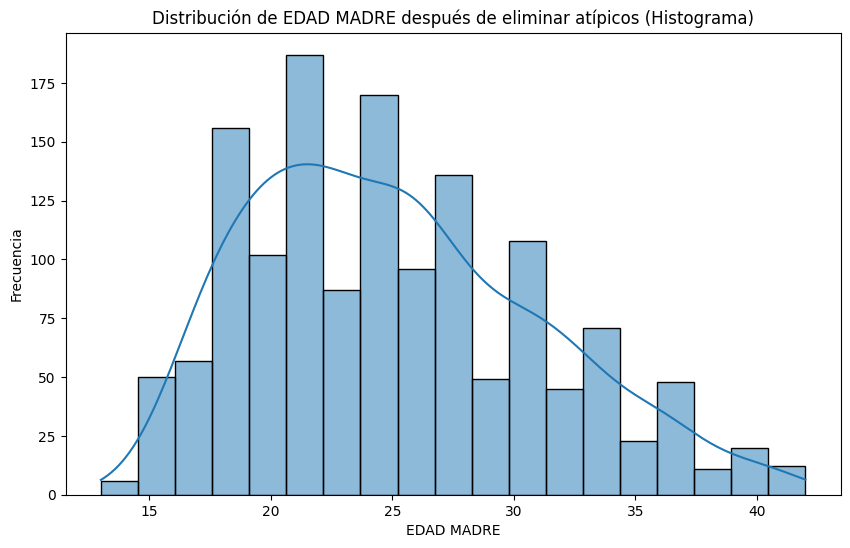

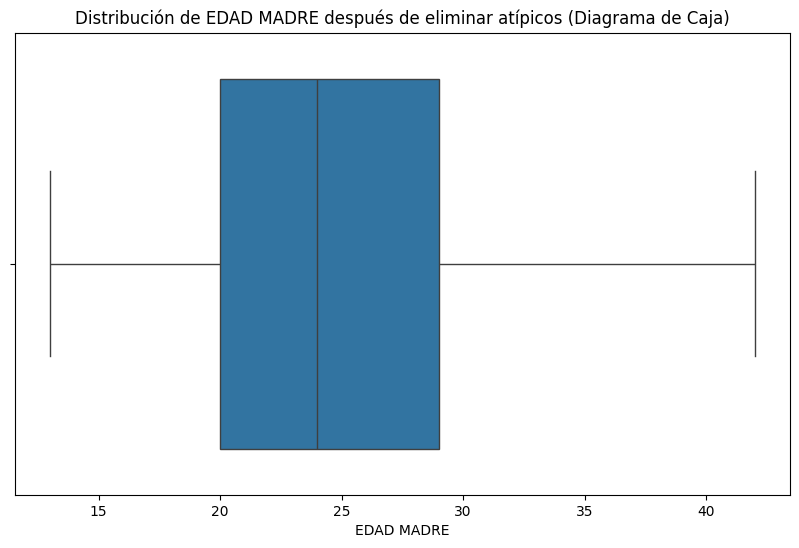

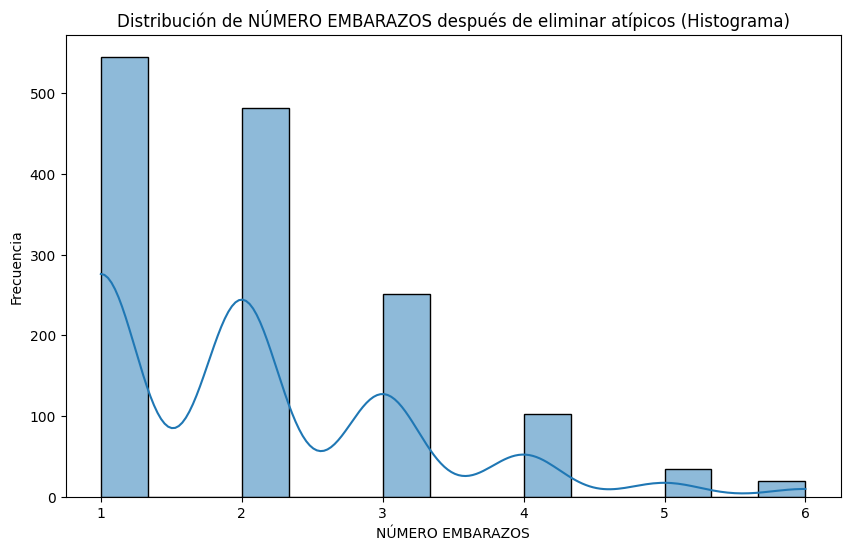

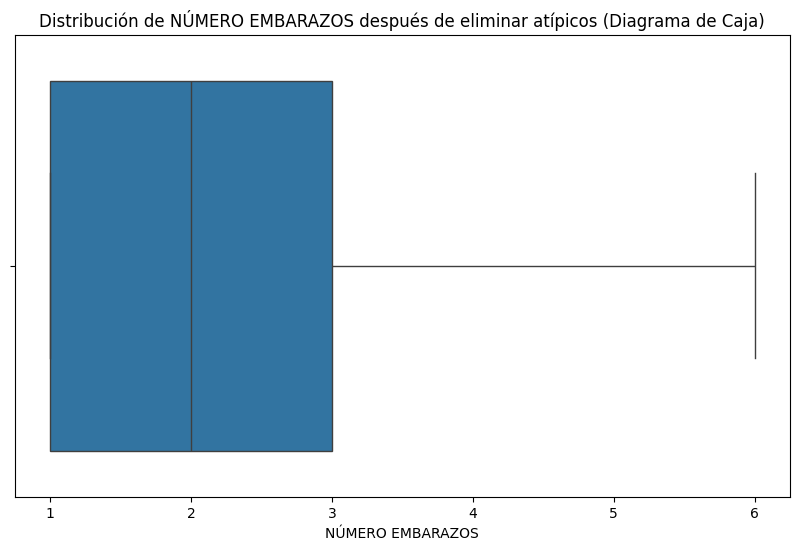

In [ ]:
numerical_cols = ['PESO (Gramos)', 'TALLA (Centímetros)', 'EDAD PADRE', 'EDAD MADRE', 'NÚMERO EMBARAZOS']

for var in numerical_cols:
    # Histograma
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_cleaned, x=var, kde=True)
    plt.title(f'Distribución de {var} después de eliminar atípicos (Histograma)')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

    # Diagrama de caja
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_cleaned, x=var)
    plt.title(f'Distribución de {var} después de eliminar atípicos (Diagrama de Caja)')
    plt.xlabel(var)
    plt.show()